Import public packages and functions

In [3]:
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import math
import statistics as stat
import json
from scipy import interp

Import Cross Validation Packages

In [4]:
from sklearn.model_selection import LeaveOneOut, LeaveOneGroupOut
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import LabelEncoder

Import Classifiers and Feature Selection Algorithms

In [5]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# from sklearn.preprocessing import LabelEncoder
# import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, auc

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler

In [6]:
def get_repo_path_in_notebook():
    """
    Finds path of repo from Notebook.
    Start running this once to correctly find
    other modules/functions
    """
    path = os.getcwd()
    repo_name = 'ultraleap_analysis'

    while path[-len(repo_name):] != 'ultraleap_analysis':

        path = os.path.dirname(path)

    return path

In [7]:
repo_path = get_repo_path_in_notebook()
code_path = os.path.join(repo_path, 'code')
os.chdir(code_path)

Import own functions

In [8]:
import sig_processing.extract_scores as sc_ext
import sig_processing.predict as pred
import plotting.boxplotting as bxplt
import statistic.stat_analysis as statis

## 1. Loading features (X) and scores (y)

Load features from csv

In [9]:
import import_data.find_paths as find_paths

In [10]:
importlib.reload(pred)

<module 'sig_processing.predict' from 'c:\\Users\\madal\\Projects\\Thesis\\ultraleap_analysis\\code\\sig_processing\\predict.py'>

In [21]:
# define task
folder = 'patientdata'
task = 'ps'
# feat_file = 'features'
feat_file = 'new_features'


feat_df_path = os.path.join(
    repo_path,
    'EDA',
    folder,
    task, 
    f'{feat_file}.csv'
    )

X_df = pd.read_csv(feat_df_path, index_col=0)
feat_cols = X_df.iloc[:,1:].columns
print(len(feat_cols))


# Load scores/labels
y_with_nan = sc_ext.get_labels_for_feat_df(X_df)
y = np.array([i for i in y_with_nan if not np.isnan(i)])


# Remove non-scored/non-existing rows/blocks
try:
    X_df = sc_ext.remove_non_score_rows(X_df, y_with_nan)
except KeyError:
    print('Non-scored/non-existing rows/blocks have already been scored.')
X_df


# Create group encoder for leave one group out cross validation
groups = [X_df['file'].iloc[row][3:8] for row in np.arange(0, X_df.shape[0])]
group_encoder = LabelEncoder()
group_int = group_encoder.fit_transform(groups)

# Alternative method to encode the groups
# group_encoder = {group: i for i, group in enumerate(np.unique(groups))}
# group_int = np.array([group_encoder[group] for group in groups])

24
No scores for block ('b1', 'ul020', 'm0s0', 'vr', 'ps', 'rh') or this combination does not exist
No scores for block ('b2', 'ul020', 'm0s0', 'vr', 'ps', 'rh') or this combination does not exist
No scores for block ('b1', 'ul020', 'm1s1', 'dt', 'ps', 'rh') or this combination does not exist
No scores for block ('b2', 'ul020', 'm1s1', 'dt', 'ps', 'rh') or this combination does not exist
No scores for block ('b1', 'ul020', 'm0s0', 'vr', 'ps', 'lh') or this combination does not exist
No scores for block ('b2', 'ul020', 'm0s0', 'vr', 'ps', 'lh') or this combination does not exist
No scores for block ('b1', 'ul020', 'm1s1', 'dt', 'ps', 'lh') or this combination does not exist
No scores for block ('b2', 'ul020', 'm1s1', 'dt', 'ps', 'lh') or this combination does not exist


## 2. Feature Selection
A - None

B - RFECV

C - RFE

D - Correlation Coefficient (without feature scaling)

E - Kruskal

F - Kruskal and Correlation Matrix

G - Lasso Regularization

### A - None

In [79]:
# Without feature selection
feat_selector = 'none'
X_norm = MinMaxScaler().fit_transform(X_df.iloc[:,1:]) # y = (x – min) / (max – min)
X_df_norm = pd.DataFrame(data=X_norm, columns=X_df.iloc[:,1:].columns)
X_df = X_df_norm
X = X_df.values
X_df

,num_events,mean_max_dist,sd_max_dist,coef_var_max_dist,slope_max_dist,decr_max_dist,mean_max_vel,sd_max_vel,coef_var_max_vel,slope_max_vel,...,mean_tap_dur,sd_tap_dur,coef_var_tap_dur,slope_tap_dur,mean_rms,sd_rms,slope_rms,sum_rms,jerkiness,entropy
0,0.516129,0.512020,0.114402,0.105152,0.399019,0.113929,0.428370,0.071340,0.064812,0.546804,...,0.152202,0.078928,0.147778,0.376189,0.376107,0.085757,0.305384,0.280487,0.317132,0.540364
1,0.548387,0.494189,0.140689,0.131354,0.389074,0.160403,0.517126,0.117898,0.100159,0.622865,...,0.126738,0.083958,0.170918,0.378851,0.401739,0.134279,0.326148,0.314501,0.421027,0.541340
2,0.612903,0.410923,0.372025,0.380931,0.354520,0.238217,0.323147,0.117145,0.169989,0.555330,...,0.090952,0.077299,0.182407,0.366213,0.354076,0.396721,0.296853,0.318791,0.404622,0.541340
3,0.580645,0.448868,0.291119,0.283478,0.405410,0.216180,0.412486,0.164509,0.193942,0.549687,...,0.059805,0.070649,0.193372,0.376309,0.387010,0.336284,0.339999,0.323378,0.437361,0.615730
4,0.806452,0.387629,0.436652,0.461843,0.436994,1.000000,0.398953,0.263700,0.338716,0.631125,...,0.049214,0.053817,0.161111,0.369074,0.335997,0.487407,0.372299,0.406121,0.574051,0.615730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.129032,0.873088,0.287320,0.173818,0.437987,0.113160,0.147697,0.132460,0.402615,0.370876,...,0.408578,0.217267,0.206287,0.560199,0.848951,0.217061,0.350801,0.180027,0.291017,0.743845
172,0.322581,0.924432,0.115150,0.066845,0.313750,0.096897,0.286761,0.092722,0.147060,0.568238,...,0.263612,0.272589,0.349003,0.359347,0.807222,0.117590,0.224468,0.354762,0.284799,0.614843
173,0.193548,0.903376,0.516138,0.303375,0.640167,0.283441,0.464756,0.467405,0.537441,0.401131,...,0.403284,0.352735,0.335987,0.280366,0.689253,0.497301,0.579887,0.196144,0.373432,0.681194
174,0.290323,0.785621,0.084411,0.056557,0.378344,0.101068,0.120514,0.038077,0.126168,0.590437,...,0.247609,0.401244,0.530315,0.477469,0.748170,0.160304,0.277090,0.300904,0.087503,0.459095


### B - RFECV

Using RFECV w/ Logistic Regression classifier

In [11]:
importlib.reload(pred)

<module 'sig_processing.predict' from 'c:\\Users\\madal\\Projects\\Thesis\\ultraleap_analysis\\code\\sig_processing\\predict.py'>

c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Optimal number of features: 2
Selected features: ['mean_max_vel', 'mean_mean_vel']


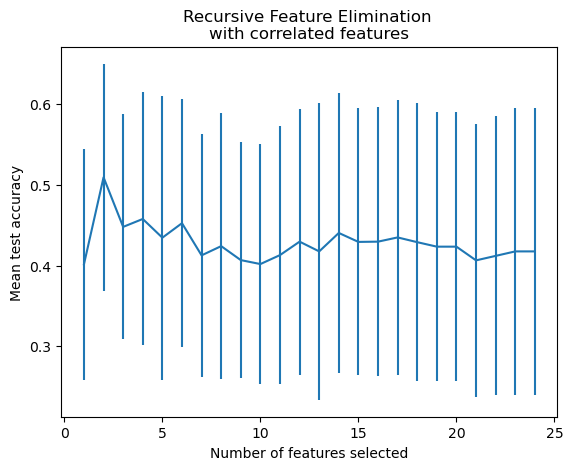

rfe_logit_10folds_2
2


In [46]:
# Define number of folds for cross validation
num_folds = 10
# num_folds = 10

# Define classifier for RFE
rfe_model_str = 'logit'

# Perform RFECV with rfe_cv_feat_selector() function present on predict.py
rfe_logit, X_norm =  pred.rfe_cv_feat_selector(X_df, y, rfe_model_str,num_folds)

# Define feat_selector string for further saving purposes
feat_selector = f'rfe_{rfe_model_str}_{num_folds}folds_{len(rfe_logit)}'
print(feat_selector)
X_df_norm = pd.DataFrame(data=X_norm, columns=X_df.iloc[:,1:].columns)
X_df = X_df_norm[rfe_logit]
X = X_df.values
print(len(X[0]))

### C - RFE

Using RFE w/ Logistic Regression

In [61]:
X_norm = MinMaxScaler().fit_transform(X_df.iloc[:,1:]) # y = (x – min) / (max – min)
num_feats = 10
rfe_model = 'logit'
feat_selector = f'rfe_{rfe_model}_{num_feats}'

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=1, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X_df.iloc[:,1:].loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

print(rfe_feature)
X_df_norm = pd.DataFrame(data=X_norm, columns=X_df.iloc[:,1:].columns)
X_df_norm
X_df = X_df_norm[rfe_feature]
X_df
X = X_df.values
len(X[0])

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
10 selected features
['num_events', 'mean_max_vel', 'mean_mean_vel', 'sd_mean_vel', 'coef_var_mean_vel', 'slope_tap_dur', 'sd_rms', 'sum_rms', 'jerkiness', 'entropy']


10

### D - Correlation Matrix
###### Feature selection based on correlation coefficients does not require scaling. Correlation is scale-invariant, which means it remains the same if all values of one or both of the variables are multiplied by a constant

In [55]:
importlib.reload(statis)
feat_selector = 'corr_matrix'
correlation_matrix = statis.plot_correlation_matrix(X_df, task, feat_file, to_save=False)
# define threshold for redundant features
threshold = 0.7

# np.where() gives a tuple with 2 arrays corresponding to (row, col), respectively
highly_corr_fts = np.where(
    np.logical_and(correlation_matrix > threshold, correlation_matrix != 1)
    )

# the abs function takes the absolute value of the correlation matrix, so any value 
# above 0.7, whether it's positive or negative, will be considered
# # highly_corr_fts = np.where(
# #     np.logical_and(abs(corr_matrix) > threshold, corr_matrix != 1)
# # )

corr_pairs = list(zip(highly_corr_fts[0], highly_corr_fts[1]))

pairs_name = []
for pair in corr_pairs:
    if pair[0] < pair[1]:
        print(f"Features '{correlation_matrix.columns[pair[0]]}' and '{correlation_matrix.columns[pair[1]]}' are highly correlated (correlation coefficient = {correlation_matrix.iloc[pair]})")
        pairs_name.append((correlation_matrix.columns[pair[0]],correlation_matrix.columns[pair[1]]))

feat_to_remove = set([pairs_name[i][1] for i in np.arange(len(pairs_name))])
feat_to_remove
print(X_df.iloc[:,1:].drop(columns = feat_to_remove).columns)
X_norm = MinMaxScaler().fit_transform(X_df.iloc[:,1:].drop(columns = feat_to_remove)) # y = (x – min) / (max – min)
X = X_norm
X.shape[1]



Features 'num_events' and 'sum_rms' are highly correlated (correlation coefficient = 0.750190253991503)
Features 'mean_max_dist' and 'mean_rms' are highly correlated (correlation coefficient = 0.9372991415364297)
Features 'sd_max_dist' and 'coef_var_max_dist' are highly correlated (correlation coefficient = 0.9558067356372442)
Features 'sd_max_dist' and 'coef_var_max_vel' are highly correlated (correlation coefficient = 0.7678670482060312)
Features 'sd_max_dist' and 'coef_var_mean_vel' are highly correlated (correlation coefficient = 0.7582500550297161)
Features 'sd_max_dist' and 'sd_rms' are highly correlated (correlation coefficient = 0.9029451904028175)
Features 'coef_var_max_dist' and 'coef_var_max_vel' are highly correlated (correlation coefficient = 0.7413625357693154)
Features 'coef_var_max_dist' and 'coef_var_mean_vel' are highly correlated (correlation coefficient = 0.7504204270305965)
Features 'coef_var_max_dist' and 'sd_rms' are highly correlated (correlation coefficient = 0

14

### E - Kruskal

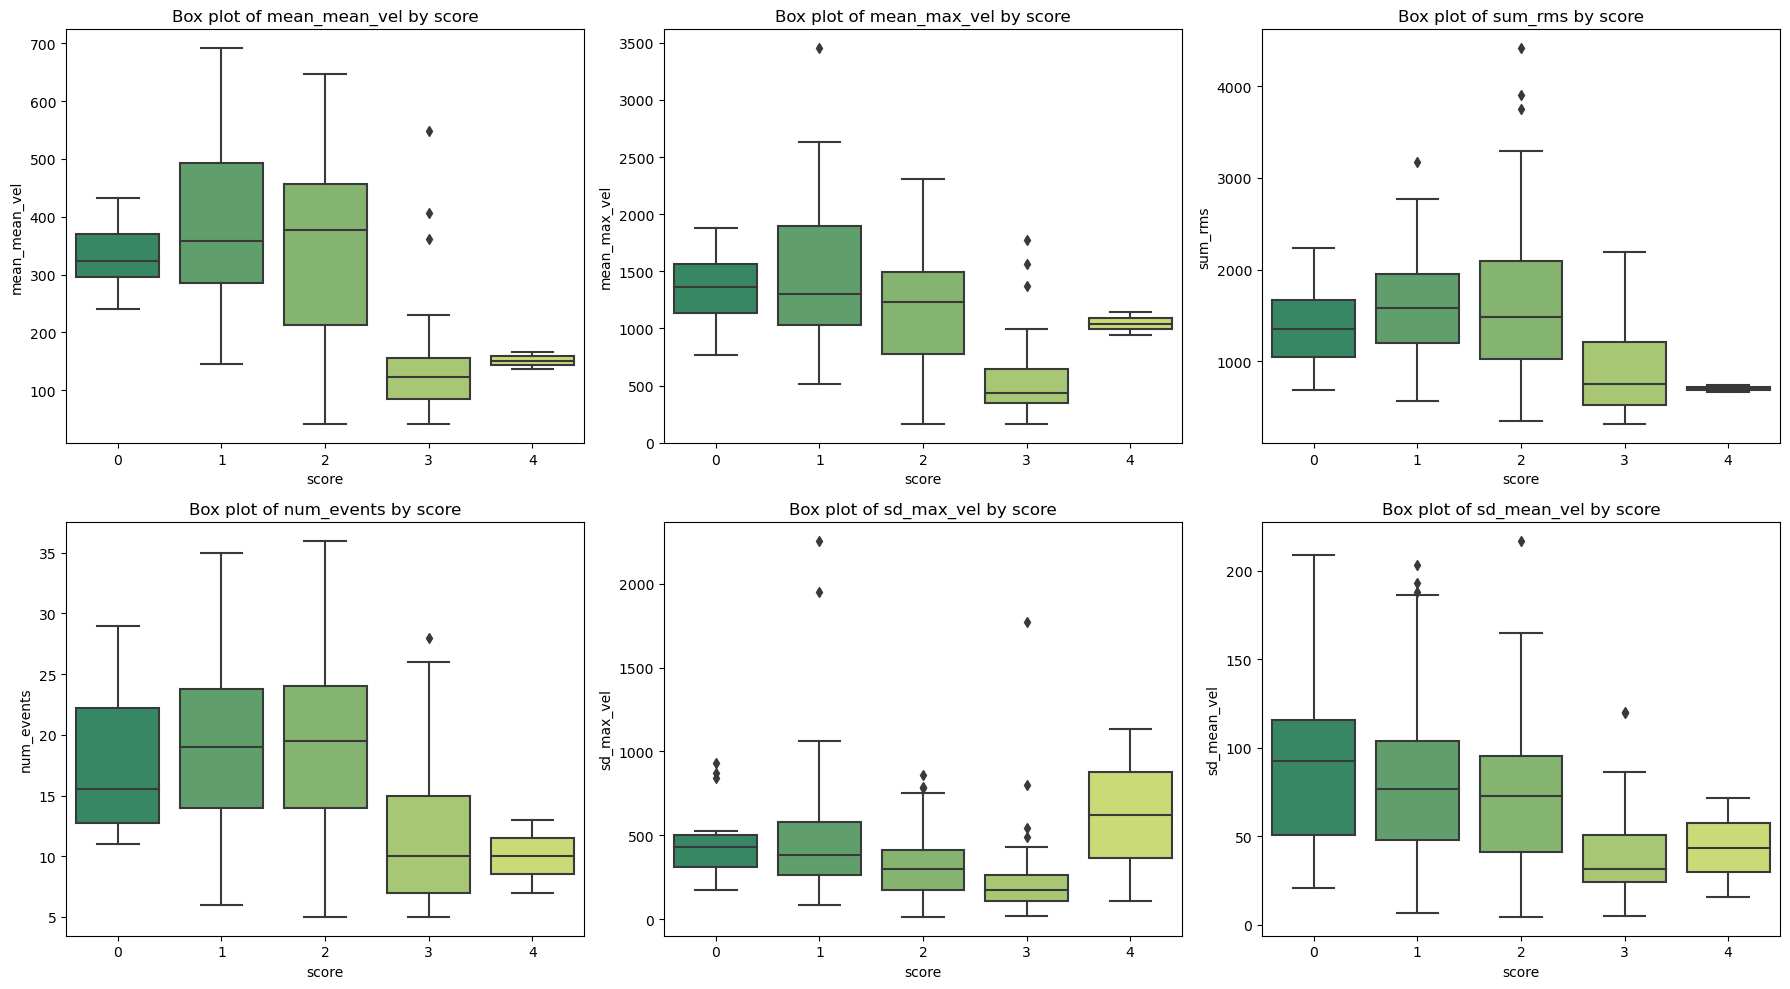

,feature,H_statistic,p_value
10,mean_mean_vel,53.747814,5.943037e-11
6,mean_max_vel,52.903754,8.926226e-11
21,sum_rms,37.172230,1.659974e-07
0,num_events,29.707303,5.613975e-06
7,sd_max_vel,28.132775,1.172343e-05
11,sd_mean_vel,26.459914,2.555679e-05
14,mean_tap_dur,25.220978,4.541591e-05
17,slope_tap_dur,22.564163,1.547128e-04
15,sd_tap_dur,12.255727,1.554755e-02
5,decr_max_dist,9.595534,4.782081e-02


['mean_mean_vel', 'mean_max_vel', 'sum_rms', 'num_events', 'sd_max_vel', 'sd_mean_vel', 'mean_tap_dur', 'slope_tap_dur']


8

In [20]:
importlib.reload(statis)
test = 'Kruskal_Wallis'
test_kruskal = statis.krusk_wal_test(X_df, y, task, test, feat_file)
feat_selector = 'kruskal'

significant_features = test_kruskal[test_kruskal['p_value']<=0.002].feature.to_list()
# X = X_df[significant_features].values
# X
print(significant_features)
X_norm = MinMaxScaler().fit_transform(X_df[significant_features]) # y = (x – min) / (max – min)
X = X_norm
X.shape[1]

### F - Kruskal and Correlation Matrix

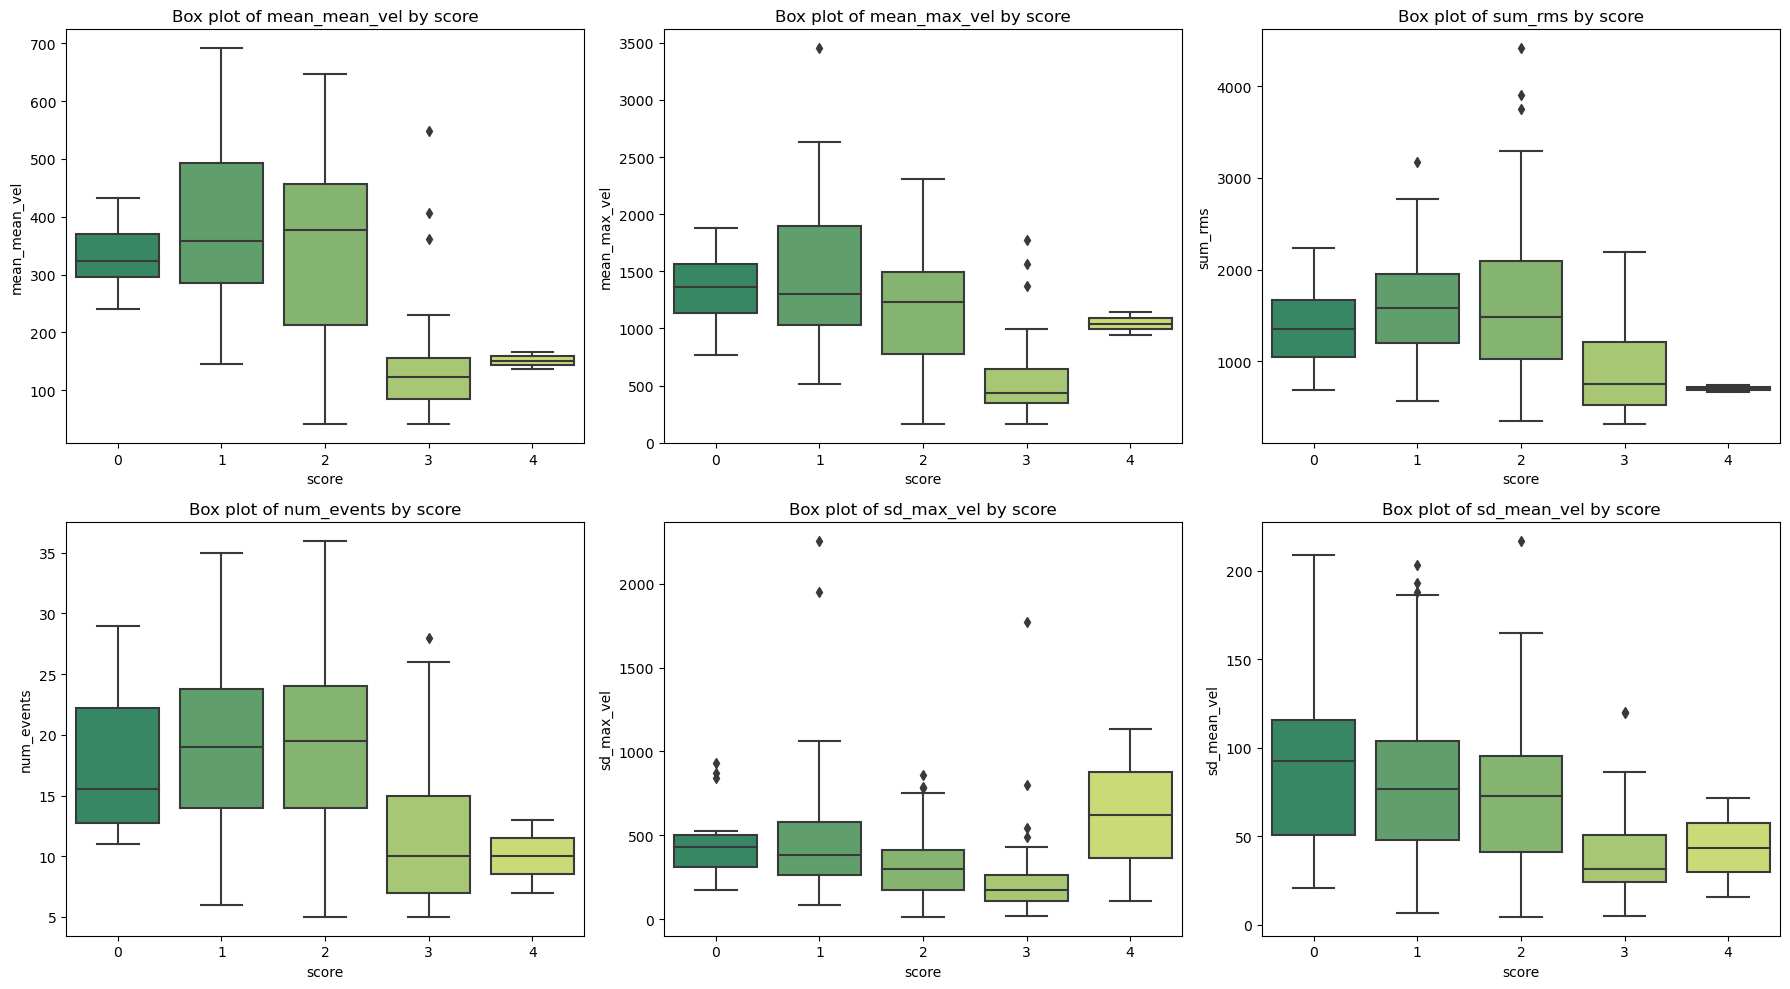

,feature,H_statistic,p_value
10,mean_mean_vel,53.747814,5.943037e-11
6,mean_max_vel,52.903754,8.926226e-11
21,sum_rms,37.172230,1.659974e-07
0,num_events,29.707303,5.613975e-06
7,sd_max_vel,28.132775,1.172343e-05
11,sd_mean_vel,26.459914,2.555679e-05
14,mean_tap_dur,25.220978,4.541591e-05
17,slope_tap_dur,22.564163,1.547128e-04
15,sd_tap_dur,12.255727,1.554755e-02
5,decr_max_dist,9.595534,4.782081e-02


Some features are missing in X_df.
Features 'mean_mean_vel' and 'mean_max_vel' are highly correlated (correlation coefficient = 0.896370239929562)
Features 'mean_mean_vel' and 'sum_rms' are highly correlated (correlation coefficient = 0.7767114241690513)
Features 'sum_rms' and 'num_events' are highly correlated (correlation coefficient = 0.750190253991503)
Features 'sd_max_vel' and 'sd_mean_vel' are highly correlated (correlation coefficient = 0.772278230244332)
Index(['mean_mean_vel', 'sd_max_vel', 'mean_tap_dur', 'slope_tap_dur'], dtype='object')


4

In [22]:
importlib.reload(statis)
test = 'Kruskal_Wallis'
test_kruskal = statis.krusk_wal_test(X_df, y, task, test, feat_file)
feat_selector = 'kruskal_corr'

significant_features = test_kruskal[test_kruskal['p_value']<=0.002].feature.to_list()

correlation_matrix = statis.plot_correlation_matrix(X_df[significant_features], task, feat_file, to_save=False)

# define threshold for redundant features
threshold = 0.7

# np.where() gives a tuple with 2 arrays corresponding to (row, col), respectively
highly_corr_fts = np.where(
    np.logical_and(correlation_matrix > threshold, correlation_matrix != 1)
    )

# the abs function takes the absolute value of the correlation matrix, so any value 
# above 0.7, whether it's positive or negative, will be considered
# # highly_corr_fts = np.where(
# #     np.logical_and(abs(corr_matrix) > threshold, corr_matrix != 1)
# # )

corr_pairs = list(zip(highly_corr_fts[0], highly_corr_fts[1]))

pairs_name = []
for pair in corr_pairs:
    if pair[0] < pair[1]:
        print(f"Features '{correlation_matrix.columns[pair[0]]}' and '{correlation_matrix.columns[pair[1]]}' are highly correlated (correlation coefficient = {correlation_matrix.iloc[pair]})")
        pairs_name.append((correlation_matrix.columns[pair[0]],correlation_matrix.columns[pair[1]]))

feat_to_remove = set([pairs_name[i][1] for i in np.arange(len(pairs_name))])

# drop redundant features from X_df dataframe, leave out file name column and get X array
print(X_df[significant_features].drop(columns = feat_to_remove).columns)

X_norm = MinMaxScaler().fit_transform(X_df[significant_features].drop(columns = feat_to_remove)) # y = (x – min) / (max – min)
X = X_norm
X.shape[1]
# X = X_df[significant_features].drop(columns = feat_to_remove).values
# X.shape[1]

### G - Lasso Regularization

c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


119


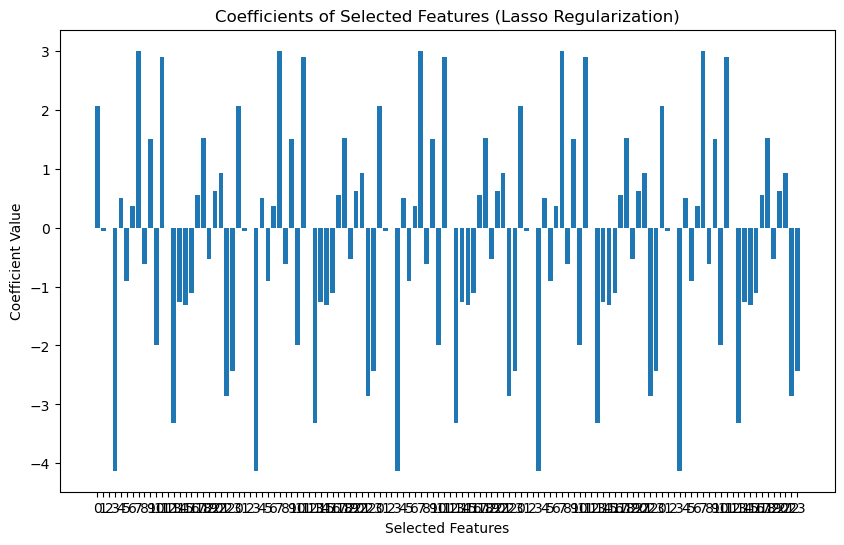

In [25]:
from sklearn.model_selection import train_test_split

rfe_selector = 'lasso'

X_train, X_test, y_train, y_test = train_test_split(X_df.iloc[:,1:], y, test_size = 0.3, random_state = 42)

X_train_scaled = MinMaxScaler().fit_transform(X_train) # y = (x – min) / (max – min)
X_test_scaled = MinMaxScaler().fit_transform(X_test) # y = (x – min) / (max – min)

# Apply L1 regularization (Lasso) for feature selection
reg_param = 0.01
lasso_model = LogisticRegression(multi_class='multinomial', penalty='l1', C=1/reg_param, solver='saga')
lasso_model.fit(X_train_scaled, y_train)

# Get selected features using non-zero coefficients
selected_features_indices = np.where(lasso_model.coef_ != 0)[1]
selected_feature_names = X_train.columns[selected_features_indices]  # Get column names of selected features

print(len(selected_feature_names))
# Plot the coefficients of the selected features
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), lasso_model.coef_[0, selected_features])
plt.xticks(range(len(selected_features)), selected_features)
plt.xlabel('Selected Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Selected Features (Lasso Regularization)')
plt.show()

## 3. Data splitting, create training and test data
### Train Classifiers

In [23]:
importlib.reload(pred)
ls_model = ['neuralnet','linearsvm','nonlinearsvm', 'logit','randomforest','kneighbors','gaussiannaivebayes']
ls_binary = [True,False]
ls_cvlabel = ['skf', 'logocv']
# ls_cvlabel = ['skf', 'logocv', 'loocv']

for model in ls_model: 
    for cl in ls_binary:
        for cv in ls_cvlabel:
            if cv=='logocv':
                group_int=group_int
            pred.classifier(task, feat_selector, feat_file, cv, model, X, y, binary = cl, group_int=group_int)

1/1 [==============================] - 0s 32ms/step


c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


2/2 [==============================] - 0s 15ms/step


c:\Users\madal\Projects\Thesis\ultraleap_analysis\code\sig_processing\predict.py:109: RuntimeWarning: invalid value encountered in divide
  prec = np.diag(cm) / np.sum(cm, axis=0)


1/1 [==============================] - 0s 34ms/step


c:\Users\madal\Projects\Thesis\ultraleap_analysis\code\sig_processing\predict.py:109: RuntimeWarning: invalid value encountered in divide
  prec = np.diag(cm) / np.sum(cm, axis=0)
c:\Users\madal\Projects\Thesis\ultraleap_analysis\code\sig_processing\predict.py:111: RuntimeWarning: invalid value encountered in divide
  f1 = 2 * (prec * rec) / (prec + rec)
c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\madal\Projects\Thesis\ultraleap_analysis\code\sig_processing\predict.py:109: RuntimeWarning: invalid value encountered in divide
  prec = np.diag(cm) / np.sum(cm, axis=0)
c:\Users\madal\Projects\Thesis\ultraleap_analysis\code\sig_processing\predict.py:111: RuntimeWarning: invalid value encountered in divide
  f1 = 2 * (prec * rec) / (prec + rec)
c:\Users\madal\Projects\Thesis\ultraleap_analysis\code\sig_processing\predict

## 4. Create Tables w/ Results 

In [25]:
task = 'ps'
ls_model = ['neuralnet','linearsvm','nonlinearsvm', 'logit','randomforest','kneighbors','gaussiannaivebayes']
# ls_class = ['binary', 'multiclass']
cl = 'multiclass'
cvlabel = 'logocv'
all_data = pd.DataFrame()

for model in ls_model:
    # for cl in ls_class:
    read_metrics = pd.read_excel(os.path.join(repo_path,'modelling', feat_file, task, feat_selector, cl, cvlabel, model, f'{task}_{feat_selector}_{cl}_{cvlabel}_{model}_metrics.xlsx'), index_col=0)
    read_metrics = read_metrics.transpose()
    read_metrics['model'] = model

    all_data = all_data.append(read_metrics)
    

all_data.set_index('model', inplace=True)
all_data.index.name = None

path_metrics_total = os.path.join(repo_path, 'modelling', feat_file, task, feat_selector, cl, cvlabel)
if not os.path.exists(path_metrics_total):
    os.makedirs(path_metrics_total)
all_data.to_excel(os.path.join(path_metrics_total, f'{task}_{feat_selector}_{cl}_{cvlabel}_metrics_total.xlsx'))
all_data


C:\Users\madal\AppData\Local\Temp\ipykernel_13956\748741097.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(read_metrics)
C:\Users\madal\AppData\Local\Temp\ipykernel_13956\748741097.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(read_metrics)
C:\Users\madal\AppData\Local\Temp\ipykernel_13956\748741097.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(read_metrics)
C:\Users\madal\AppData\Local\Temp\ipykernel_13956\748741097.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(read_metrics)
C:\Users\madal\AppData\Local

,Accuracy,Precision_0,Precision_1,Precision_2,Precision_3,Precision_4,Recall_0,Recall_1,Recall_2,Recall_3,Recall_4,F1_0,F1_1,F1_2,F1_3,F1_4,Macro-Avg F1
neuralnet,0.414773,NaN,0.317460,0.383562,0.641026,0.0,0.00,0.344828,0.424242,0.735294,0.0,NaN,0.330579,0.402878,0.684932,NaN,0.472796
linearsvm,0.329545,NaN,0.270833,0.269663,0.538462,NaN,0.00,0.224138,0.363636,0.617647,0.0,NaN,0.245283,0.309677,0.575342,NaN,0.376768
nonlinearsvm,0.244318,NaN,0.111111,0.212121,0.531250,NaN,0.00,0.086207,0.318182,0.500000,0.0,NaN,0.097087,0.254545,0.515152,NaN,0.288928
logit,0.301136,NaN,0.204082,0.265306,0.586207,NaN,0.00,0.172414,0.393939,0.500000,0.0,NaN,0.186916,0.317073,0.539683,NaN,0.347891
randomforest,0.329545,0.00,0.276923,0.287671,0.593750,NaN,0.00,0.310345,0.318182,0.558824,0.0,NaN,0.292683,0.302158,0.575758,NaN,0.390200
kneighbors,0.312500,0.00,0.269231,0.295082,0.592593,NaN,0.00,0.362069,0.272727,0.470588,0.0,NaN,0.308824,0.283465,0.524590,NaN,0.372293
gaussiannaivebayes,0.414773,0.16,0.433333,0.417582,0.666667,0.0,0.25,0.224138,0.575758,0.529412,0.0,0.195122,0.295455,0.484076,0.590164,NaN,0.391204


#############################################################

ROC curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression

# Assuming you have X (input features), y (target variable), and groups (group labels)
# Replace them with your own data

# Initialize the LeaveOneGroupOut cross-validator
logo = LeaveOneGroupOut()

# Initialize lists to store true labels and predicted probabilities for all folds
true_labels = []
pred_probs = []

# Iterate over each fold
for train_index, test_index in logo.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit your classifier (e.g., Logistic Regression) on the training data
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict the probabilities for the test data
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Store true labels and predicted probabilities for this fold
    true_labels.extend(y_test)
    pred_probs.extend(y_pred_prob)

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(true_labels, pred_probs)

# Compute the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
